# 01. Basic Tutorial

In Basic Tutorial, you can learn the following things:

* Define Search Space
* Optimize Objective Function

This tutorial describes how to optimize Hyperparameters using HyperOpt without having a mathematical understanding of any algorithm implemented in HyperOpt.

In [1]:
# Import HyperOpt Library
from hyperopt import tpe, hp, fmin

Declares a purpose function to optimize. In this tutorial, we will optimize a simple function called `objective`, which is a simple quadratic function.

$$ y = (x-3)^2 + 2 $$

In [2]:
objective = lambda x: (x-3)**2 + 2

Now, let's visualize this objective function.

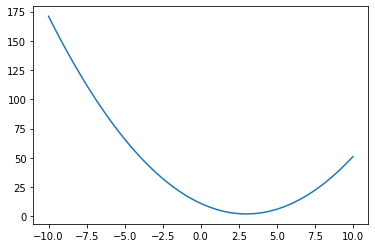

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = objective(x)

fig = plt.figure()
plt.plot(x, y)
plt.show()

We are trying to optimize the `objective` by changing the HyperParameter $x$. That's why we will declare a search space for $x$. The functions related to the search space are implemented in `hyperopt.hp`. The list is as follows.

* `hp.randint(label, upper)` or `hp.randint(label, low, high)`
* `hp.uniform(label, low, high)`
* `hp.loguniform(label, low, high)`    
* `hp.normal(label, mu, sigma)`
* `hp.lognormal(label, mu, sigma)`
* `hp.quniform(label, low, high, q)`
* `hp.qloguniform(label, low, high, q)`
* `hp.qnormal(label, mu, sigma, q)`
* `hp.qlognormal(label, mu, sigma, q)`
* `hp.choice(label, list)`

We will use the most basic `hp.uniform` in this tutorial.
    

In [5]:
# Define the search space of x between -10 and 10.
space = hp.uniform('x', -10, 10)

Now, there's only one last step left. So far, we have defined a function of purpose, and we have defined a search space for $x$. Now we can search through the search space $x$ and find the value of $x$ that can optimize the `objective`. HyperOpt performs it using `fmin`.

In [5]:
best = fmin(
    fn=objective, # Objective Function to optimize
    space=space, # Hyperparameter's Search Space
    algo=tpe.suggest, # Optimization algorithm (representative TPE)
    max_evals=1000 # Number of optimization attempts
)
print(best)

100%|██████████| 1000/1000 [00:04<00:00, 228.56trial/s, best loss: 2.000001036046408]
{'x': 3.0010178636491283}


The optimal $x$ value found by HyperOpt is approximately 3.0. This is very close to a solution of $y=(x-3)^2+2$.